<a href="https://colab.research.google.com/github/cego2/Projeto/blob/master/projeto_interpolacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Interpolação / Ajuste de curvas


LEI DE MOORE: EVOLUÇÃO DO NÚMERO DE TRANSISTORES

Em 1965, Gordon Moore fez uma previsão que determinaria o ritmo da revolução digital moderna. A partir da observação cuidadosa de uma nova tendência, Moore concluiu que o poder da computação aumentaria tremendamente e que seu custo relativo cairia a um ritmo vertiginoso. Essa percepção, conhecida como Lei de Moore, transformou-se na regra de ouro da indústria eletrônica e em um trampolim para a inovação. Na condição de cofundador, Gordon preparou o terreno para a Intel fabricar os mais rápidos, menores e mais econômicos transistores de todos os tempos que acionam nossas modernas ferramentas e nossos brinquedos. Mesmo após 55 anos, o impacto e os benefícios duradouros são sentidos de várias formas.



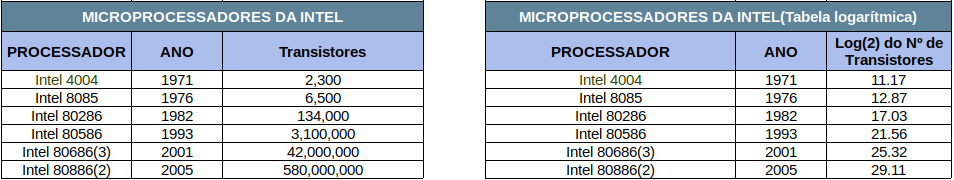

Na tabela acima temos a evolução do número de transistores por ano. A empresa **Supremacia** precisa encontrar o número estimado de transistores no ano de 2003. Como o ano desejado está entre o intervalo apresentado na tabela(1971 - 2005), recomenda-se o uso dos métodos de interpolação e para este problema utilizaremos o método do Polinômio de Newton.

In [ ]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

In [ ]:
xi = np.array([1971,1976,1982,1993,2001,2005], dtype ='float')
yi = np.array([11.17,12.87,17.03,21.56,25.32,29.11], dtype ='float')
xi,yi

(array([1971., 1976., 1982., 1993., 2001., 2005.]),
 array([11.17, 12.87, 17.03, 21.56, 25.32, 29.11]))

In [ ]:
def dd(x,y):
    if len(x) == 1:
        return y[0]
    else:
        return (dd(x[1:],y[1:]) - dd(x[:-1], y[:-1])) / (x[-1] - x[0])

In [ ]:
x = sympy.Symbol('x')
x

x

In [ ]:
Px = yi[0]
for i in range(2, len(xi) + 1):
  termo = dd(xi[0:i],yi[0:i])
  for j in range(i-1):
    termo *= (x - xi[j])
    Px += termo

In [ ]:
Px = sympy.simplify(Px)
Px

-2.11528178417764e-6*x**5 + 0.0210877473971226*x**4 - 84.0895704033263*x**3 + 167654.071066872*x**2 - 167126812.710226*x + 66638963144.3496

In [ ]:
poli = sympy.lambdify(x,Px,'numpy')            # PROJEÇÃO DESEJA PELA EMPRESA
poli(2003)

27.54150390625

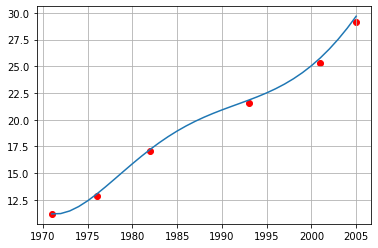

In [ ]:
xa = np.arange(1971,2006,1)             #GRÁFICO DEFINIDO DE UM ANO ANTERIOR AO ATÉ O ÚTIMO ANO DA TABELA.
ya = poli(xa)

plt.plot(xa,ya)
plt.scatter(xi,yi,c='red')
plt.grid(True)

O método de Newton conseguiu encontrar um valor coerente. Mas, divergiu um pouco da fonte de pesquisa, onde mostra para o ano de 2003 *o* crescimento de 26.42.


Ao decorrer do projeto da empresa **Supremacia**, surgiu a necessidade de encontrar o crescimento do número de transistores de dois anos a frente do último ano mostrado na tabela acima. Para isso, deverá ser usado o método de ajuste de curvas para ter uma melhor estimativa, já que trata-se de uma extrapolação.

In [ ]:
N = len(xi)
sum_xi = np.sum(xi)
sum_xi2 = np.sum(xi ** 2)
sum_xi3 = np.sum(xi ** 3)
sum_xi4 = np.sum(xi ** 4)

sum_yi = np.sum(yi)
sum_xiyi = np.sum(xi * yi)
sum_xi2yi = np.sum((xi ** 2) * yi)

A = np.array([[N, sum_xi, sum_xi2], [sum_xi, sum_xi2, sum_xi3], [sum_xi2, sum_xi3, sum_xi4]], dtype = 'float')
B = np.array([sum_yi, sum_xiyi, sum_xi2yi], dtype = 'float')
A,B

(array([[6.00000000e+00, 1.19280000e+04, 2.37138160e+07],
        [1.19280000e+04, 2.37138160e+07, 4.71468517e+10],
        [2.37138160e+07, 4.71468517e+10, 9.37392311e+13]]),
 array([1.17060000e+02, 2.33200600e+05, 4.64586534e+08]))

In [ ]:
x = np.linalg.solve(A,B)
x

array([ 8.38644168e+03, -8.92666275e+00,  2.37311630e-03])

In [ ]:
def curva(x):
  return  8.38644168e+03 -8.92666275e+00 * x + 2.37311630e-03 * x ** 2

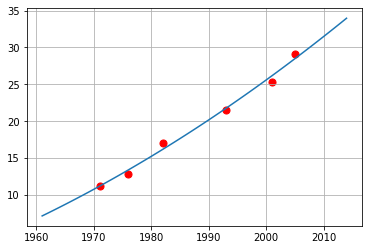

In [ ]:
xa = np.arange(1961,2015,1)           #GRAFICO DEFINIDO PARA 10 ANOS ANTES E 10 ANOS DEPOIS
ya = curva(xa)

plt.plot(xa,ya)
plt.scatter(xi,yi,c='red', s=50)
plt.grid(True)

In [ ]:
curva(2007)                  #PROJEÇÃO DESEJADA PELA EMPRESA

29.65827984869975

In [ ]:
curva(2003) #DEMONSTRAÇÃO PARA COMPARAÇÃO COM O RESULTADO DO PRIMEIRO MÉTODO APLICADO

27.300145396700827

Ambos os métodos conseguiram projeções coerentes com base nos dados fornecidos, com pouca diferença entre a fonte de onde os dados foram extraídos. Métodos eficazes, porém o método de ajuste de curvas exige mais cuidado na hora de implementar.
Ao aplicar o método de ajuste de curvas para o ano de 2003, chegamos a um resultado semelhante ao resultado obtido pelo método do Polinômio de Newton, o que ao meu ver, confirma a coerência da projeção realizada.

Quanto ao futuro, a Lei de Moore e as inovações a ela relacionadas estão se transformando na integração perfeita da computação com nossa rotina diária. Esta visão de um futuro infinitamente produtivo e interconectado oferece desafios e benefícios claros. A privacidade e as ameaças à segurança em evolução são preocupações constantes e crescentes. Porém, os benefícios da tecnologia da computação cada vez mais inteligente e disseminada, que aprende a prever nossas necessidades, podem ajudar a nos manter mais saudáveis, seguros e produtivos a longo prazo.


Fonte dos dados da tabela: https://slideplayer.com.br/slide/1730536/